In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [ ]:
!pip install quandl
import quandl

In [ ]:
!pip install yfinance

import yfinance as yf

data = yf.download("TATACONSUM.NS", start="2010-01-01")

print(data.head(-1))
print(data.info())

/tmp/ipython-input-17-332579998.py:6: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download("TATACONSUM.NS", start="2010-01-01")
[*********************100%***********************]  1 of 1 completed

Price              Close          High           Low          Open  \
Ticker     TATACONSUM.NS TATACONSUM.NS TATACONSUM.NS TATACONSUM.NS   
Date                                                                 
2010-01-04     76.871017     77.336655     76.053110     76.526847   
2010-01-05     82.831192     85.220123     77.012719     77.336643   
2010-01-06     84.126884     84.900246     81.320897     83.572162   
2010-01-07     84.422470     86.487483     83.653155     85.021726   
2010-01-08     84.843567     87.034099     84.309097     84.786881   
...                  ...           ...           ...           ...   
2025-07-04   1089.699951   1095.000000   1082.000000   1091.000000   
2025-07-07   1101.900024   1108.199951   1085.000000   1085.000000   
2025-07-08   1099.900024   1108.599976   1093.500000   1108.000000   
2025-07-09   1097.900024   1107.400024   1091.599976   1100.000000   
2025-07-10   1088.900024   1103.699951   1080.099976   1097.900024   

Price             V

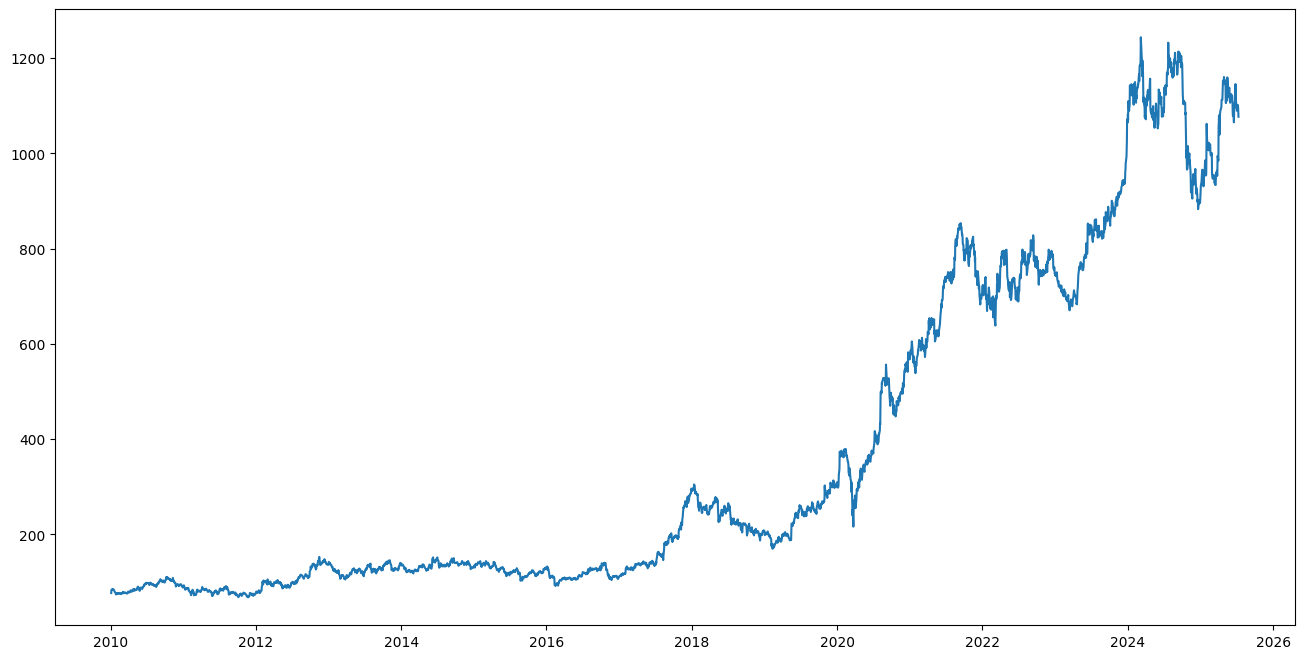

In [ ]:
plt.figure(figsize=(16,8))
plt.plot(data['Close'],label="Closing Price")

In [ ]:
data['Open-Close']= data['Open']-data['Close']
data['High-Low']= data['High']-data['Low']
data.dropna()

Price,Close,High,Low,Open,Volume,Open-Close,High-Low
Ticker,TATACONSUM.NS,TATACONSUM.NS,TATACONSUM.NS,TATACONSUM.NS,TATACONSUM.NS,,
Date,,,,,,,
2010-01-04,76.871017,77.336655,76.053110,76.526847,952740,-0.344171,1.283545
2010-01-05,82.831192,85.220123,77.012719,77.336643,7061550,-5.494549,8.207404
2010-01-06,84.126884,84.900246,81.320897,83.572162,2960980,-0.554723,3.579349
2010-01-07,84.422470,86.487483,83.653155,85.021726,3807800,0.599256,2.834328
2010-01-08,84.843567,87.034099,84.309097,84.786881,2940330,-0.056686,2.725002
...,...,...,...,...,...,...,...
2025-07-07,1101.900024,1108.199951,1085.000000,1085.000000,1152136,-16.900024,23.199951
2025-07-08,1099.900024,1108.599976,1093.500000,1108.000000,605639,8.099976,15.099976


In [ ]:
X= data[['Open-Close','High-Low']]
X.head()

Price,Open-Close,High-Low
Ticker,,
Date,,
2010-01-04,-0.344171,1.283545
2010-01-05,-5.494549,8.207404
2010-01-06,-0.554723,3.579349
2010-01-07,0.599256,2.834328
2010-01-08,-0.056686,2.725002


In [ ]:
Y = np.where(data['Close'].shift(-1)>data['Close'],1,-1)
Y

array([[ 1],
       [ 1],
       [ 1],
       ...,
       [-1],
       [-1],
       [-1]])

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,Y,test_size=0.25)

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn import neighbors
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score

params = {'n_neighbors': [2,3,4,5,6,7,8,9,10,11,12,13,14,15]}
knn = neighbors.KNeighborsClassifier()
model = GridSearchCV(knn, params, cv=5)


model.fit(X_train, y_train)

accuracy_train = accuracy_score(y_train, model.predict(X_train))
accuracy_test = accuracy_score(y_test, model.predict(X_test))

print('Train_data Accuracy: %.2f' % accuracy_train)
print('Test_data Accuracy: %.2f' % accuracy_test)


/usr/local/lib/python3.11/dist-packages/sklearn/neighbors/_classification.py:239: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.11/dist-packages/sklearn/neighbors/_classification.py:239: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.11/dist-packages/sklearn/neighbors/_classification.py:239: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.11/dist-packages/sklearn/neighbors/_classification.py:239: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for 

Train_data Accuracy: 0.69
Test_data Accuracy: 0.51


In [ ]:

predictions_classification = model.predict(X_test).ravel()
y_test_flat = y_test.ravel()


actual_predicted_data = pd.DataFrame({
    'Actual Class': y_test_flat,
    'Predicted Class': predictions_classification
})

actual_predicted_data.head(10)



,Actual Class,Predicted Class
0,-1,-1
1,1,-1
2,-1,-1
3,-1,1
4,1,-1
5,-1,1
6,-1,1
7,1,1
8,1,-1
9,-1,1


In [ ]:
y= data['Close']
y

Ticker,TATACONSUM.NS
Date,
2010-01-04,76.871017
2010-01-05,82.831192
2010-01-06,84.126884
2010-01-07,84.422470
2010-01-08,84.843567
...,...
2025-07-07,1101.900024
2025-07-08,1099.900024
2025-07-09,1097.900024


In [ ]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn import neighbors

X_train_reg, X_test_reg, y_train_reg, y_test_reg = train_test_split(X, y, test_size=0.25)


params = {'n_neighbors': [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15]}
knn_reg = neighbors.KNeighborsRegressor()
model_reg = GridSearchCV(knn_reg, params, cv=5)


model_reg.fit(X_train_reg, y_train_reg)
predictions = model_reg.predict(X_test_reg)


In [ ]:
print(predictions)

[[ 528.31577098]
 [ 109.68526357]
 [ 123.12096151]
 [ 783.79830729]
 [ 154.7111323 ]
 [ 172.71651459]
 [ 260.68462677]
 [ 958.56716715]
 [ 890.12325439]
 [ 128.20565389]
 [ 101.75727437]
 [ 898.67283122]
 [ 837.55163981]
 [ 116.75450236]
 [ 853.70731201]
 [ 151.32021637]
 [ 627.37327169]
 [ 168.41596578]
 [ 113.44619853]
 [ 266.36457621]
 [ 786.49277751]
 [ 627.98217163]
 [ 107.46405894]
 [ 133.29118245]
 [ 124.55774282]
 [ 428.76830139]
 [ 885.34370728]
 [ 750.95385742]
 [1001.87133382]
 [ 979.98258667]
 [ 848.57424113]
 [ 517.80411174]
 [ 385.45141805]
 [ 209.08517609]
 [ 794.22068939]
 [ 112.81540527]
 [ 781.56909587]
 [ 865.0524231 ]
 [ 400.2138326 ]
 [ 881.29806925]
 [ 110.67945709]
 [ 118.098791  ]
 [  95.05336761]
 [ 120.46307882]
 [ 416.5436437 ]
 [ 116.55997416]
 [ 103.74615784]
 [ 753.39343465]
 [ 121.25194956]
 [ 151.52572886]
 [ 114.9197408 ]
 [ 119.70112203]
 [ 477.82305959]
 [ 642.78788045]
 [ 167.27179565]
 [ 755.49773356]
 [ 127.47784271]
 [ 115.25350291]
 [ 692.0447041

In [ ]:
rms = np.sqrt(np.mean(np.power((np.array(y_test)-np.array(predictions)),2)))
rms

np.float64(485.53154273592503)

In [ ]:
import numpy as np

actual_arr    = np.array(y_test_reg).reshape(-1)
pred_arr      = np.array(predictions).reshape(-1)

actual_s = pd.Series(actual_arr, name='Actual Close')
pred_s   = pd.Series(pred_arr,   name='Predicted Close value')

valid = pd.concat([actual_s, pred_s], axis=1)

valid.head(10)


,Actual Close,Predicted Close value
0,689.548523,528.315771
1,127.503189,109.685264
2,130.321426,123.120962
3,1109.668579,783.798307
4,229.601196,154.711132
5,683.550720,172.716515
6,276.501923,260.684627
7,1118.491943,958.567167
8,620.758362,890.123254
9,126.592941,128.205654


/tmp/ipython-input-48-737207177.py:11: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  predicted_close = float(model_reg.predict(input_data)[0])
/tmp/ipython-input-48-737207177.py:33: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  next_close = float(model_reg.predict(input_data)[0])
/tmp/ipython-input-48-737207177.py:33: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  next_close = float(model_reg.predict(input_data)[0])
/tmp/ipython-input-48-737207177.py:33: Deprecation

📈 Predicted Close Price for Tomorrow: ₹929.37
💹 Recommended Action: Sell


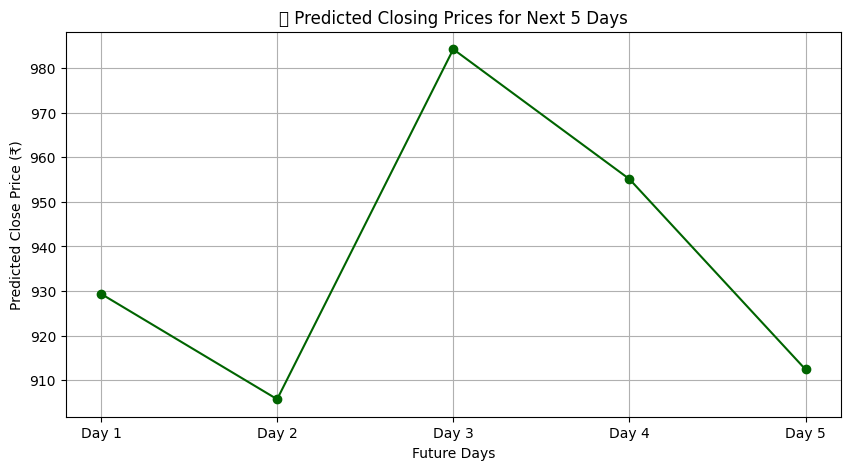

In [48]:


open_price = 1083.90
high_price = 	1101.80
low_price = 	1074.00
close_price = 1076.00

open_close = open_price - close_price
high_low = high_price - low_price
input_data = np.array([[open_close, high_low]])


predicted_close = float(model_reg.predict(input_data)[0])
predicted_action = model.predict(input_data)[0]


print(f"📈 Predicted Close Price for Tomorrow: ₹{predicted_close:.2f}")
print(f"💹 Recommended Action: {'Buy' if predicted_action == 1 else 'Sell'}")


predicted_days = [predicted_close]
days = ["Day 1"]

for i in range(2, 6):
    open_price = close_price
    close_price = predicted_days[-1]
    high_price = open_price + 20
    low_price = open_price - 20

    open_close = open_price - close_price
    high_low = high_price - low_price

    input_data = np.array([[open_close, high_low]])
    next_close = float(model_reg.predict(input_data)[0])

    predicted_days.append(next_close)
    days.append(f"Day {i}")


plt.figure(figsize=(10, 5))
plt.plot(days, predicted_days, marker='o', color='darkgreen')
plt.title("📊 Predicted Closing Prices for Next 5 Days")
plt.xlabel("Future Days")
plt.ylabel("Predicted Close Price (₹)")
plt.grid(True)
plt.show()